# Homework 8: Magnetization, Energy in the Ising Model

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Friday, June 16    

Thomas Waddleton

# Problem 0

Please be sure to fill out:
1. The course survey (e-mailed directly to you; e-mail Prof. Tanedo if you have not received this!)
2. iEval course evaluation (http://ieval.ucr.edu)
3. Sign up for a "final interview": https://doodle.com/poll/xyb7dgcupq9gwaqm

# Problem 1

Code the Ising model to study the phase transition at $T_c\approx 2.27$ (in units where $J = k_B = 1$). Use the Metropolis algorithm for Markov Chain Monte Carlo, as we set up in Lecture 18: https://github.com/Physics177-2017/Lec18-Ising-Model/blob/master/Lec18-IsingModel.ipynb

**Make the following plots:**
1. Magnetization as a function of temperature
2. Energy as a function of temperature

You may define magnetization as the total spin of the system (sum of the spins of each node). You may define the energy as the sum of $\Delta E_i$ for each spin $i$. Recall that 

$$\Delta E_i = -\sum_{j} s_is_j$$

(Note: actually, you should define $E = \sum_i \Delta E_i/4$, but we don't care about the overall pre-factors, we just want to see the qualitative shapes of the plots.)

**Guidelines**
You should be able to get reasonable results for:
* A $20\times 20$ array.
* Sampling 1000 temperature points between $T=1$ and $T=4$
* Allowing 2000 Monte Carlo steps to draw a sample.

*Pro-tip:* One way to improve your calculations is to let your Monte Carlo "equilibrate" before recording data. In other words, your Markov Chain algorithm should be:

1. Pick a random configuration
2. Run for 2000 steps (without recording data)
3. Perform your Markov Chain algorithm as usual, using the configuration at the end of step 2 as your initial configuration.


Code this up on your own, you may use the code from Lecture 18 as a starting point. 

The *answers* are available in a notebook written by Rajesh Singh:
http://rajeshrinet.github.io/blog/2014/ising-model/
... you may use that notebook (in particular, the plots) as a guideline for what your code should produce. 

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

nt = 100
N_trials = 100
N = 20
spinGrid = np.zeros([N,N], int)
temps = np.linspace(1,4,nt)

def gridPop(oldGrid):
    newGrid = oldGrid
    
    for i in range(0,N):
        for j in range(0,N):
            newGrid[i,j] = 2*randint(0,1) - 1
        
    return newGrid

def gridEnergy(spins):
    energy = 0
    
    for i in range(0,N):
        for j in range(0,N):
            energy += (spins[i,j]*spins[(i+1)%N,j] + spins[i,j]*spins[(i-1)%N,j] + spins[i,j]*spins[i,(j+1)%N] + spins[i,j]*spins[i,(j-1)%N])
    
    return -energy

In [113]:
def spinChange(spinGrid, i, j, beta):
    spin = spinGrid[i,j]
    spin_flip = -spin
    newGrid = np.zeros([N,N], int)
    
    for h in range(0,N):
        for k in range(0,N):
            if (h == i and k == j):
                newGrid[h,k] = -spinGrid[i,j]
            else:
                newGrid[h,k] = spinGrid[i,j]
    
    deltaE = gridEnergy(spinGrid) - gridEnergy(newGrid)
    
    if(deltaE < 0):
        return -spin
    else:
        if( random() < np.exp(beta*deltaE)):
            return -spin
        else:
            return spin
        
def gridChange(grid, beta):
    i = randint(0,N-1)
    j = randint(0,N-1)
    
    grid[i,j] = spinChange(grid, i, j, beta)
    return grid
    
def magnet(spinGrid):
    mag = np.sum(spinGrid)
    return mag

In [116]:
grid = gridPop(spinGrid)
totalEnergy = 0
totalMag = 0
Magnetization = np.zeros(nt)
Energy = np.zeros(nt)

for m in range(len(temps)):
    for n in range(N_trials):
        grid = gridChange(grid, 1/temps[m])
    for n in range(N_trials):
        grid = gridChange(grid, 1/temps[m])
        mag = magnet(grid)
        nrg = gridEnergy(grid)
        totalEnergy += nrg/4
        totalMag += mag
        
    Magnetization[m] = totalMag/(N_trials*N**2)
    Energy[m] = totalEnergy/(N_trials*N**2)

C:\Users\Tommy\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in exp


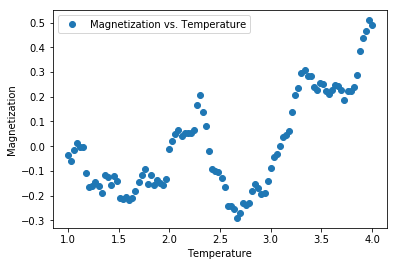

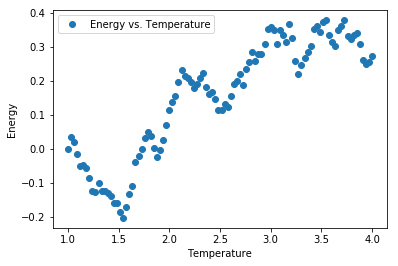

In [117]:
plt.plot(temps, Magnetization, 'o', label="Magnetization vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.legend()
plt.show()

plt.plot(temps, Energy, 'o', label="Energy vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Energy")
plt.legend()
plt.show()